In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
#Parameters


#MACD parameters
n = 9
m = 19
t = 6

#RSI parameters
period = 14

In [69]:
dataimport = pd.read_csv('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/data/Indexes/BOVESPA.csv')


dataimport['Date'] = pd.to_datetime(dataimport['Date'])
dataimport.set_index('Date', inplace=True)
data = dataimport.resample('M').first()  #Monthly Resampling

data.reset_index(inplace=True)
data['Date'] = data['Date'].astype(str)
stock_names = data.columns[1:]

datacopy = data.copy()

data

,Date,VALE3 BS Equity,PETR4 BS Equity,ITUB4 BS Equity,PETR3 BS Equity,BBDC4 BS Equity,ELET3 BS Equity,BBAS3 BS Equity,ABEV3 BS Equity,WEGE3 BS Equity,...,ELET6 BS Equity,EGIE3 BS Equity,GOAU4 BS Equity,CSNA3 BS Equity,CPFE3 BS Equity,BRAP4 BS Equity,BRKM5 BS Equity,USIM5 BS Equity,ALPA4 BS Equity,GOLL4 BS Equity
0,2011-01-31,56.97,27.00,14.899,30.30,11.774,22.665,31.40,10.231,3.251,...,27.165,21.440,27.178,27.30,19.724,18.305,20.25,18.858,6.473,25.90
1,2011-02-28,58.49,27.64,13.554,30.69,10.990,22.441,29.90,8.879,2.929,...,26.840,21.232,26.267,28.34,19.583,19.099,20.95,19.802,6.443,24.19
2,2011-03-31,55.24,28.29,13.592,32.15,11.225,23.131,28.95,9.040,3.004,...,29.460,20.960,25.050,26.25,20.325,17.380,20.11,17.993,6.305,21.30
3,2011-04-30,53.01,28.74,14.583,33.09,11.938,24.990,29.98,9.348,3.203,...,31.040,22.320,23.851,26.72,22.036,17.605,22.25,19.547,6.972,21.81
4,2011-05-31,51.22,25.73,13.723,28.69,11.097,22.342,28.89,10.152,2.836,...,28.090,22.000,22.198,22.95,21.771,16.352,21.30,15.319,6.972,21.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2022-08-31,68.08,33.68,23.470,36.50,17.390,46.500,35.68,14.630,27.880,...,47.860,44.430,9.910,14.13,32.950,21.870,34.66,8.200,21.200,8.54
140,2022-09-30,63.89,33.85,26.190,37.84,19.120,46.810,42.33,15.430,28.380,...,48.440,40.840,9.920,13.57,35.650,21.500,30.43,8.160,20.770,10.26
141,2022-10-31,74.00,32.18,29.750,36.01,21.210,45.820,41.46,16.300,33.580,...,47.420,40.590,10.770,13.25,35.690,24.280,27.47,7.720,22.500,10.05
142,2022-11-30,69.17,29.86,30.460,33.37,19.970,49.550,37.90,15.790,39.410,...,53.670,40.170,11.310,12.85,35.450,24.660,32.96,7.510,21.780,9.90


In [70]:
for name in stock_names:
    print(name)

VALE3 BS Equity
PETR4 BS Equity
ITUB4 BS Equity
PETR3 BS Equity
BBDC4 BS Equity
ELET3 BS Equity
BBAS3 BS Equity
ABEV3 BS Equity
WEGE3 BS Equity
ITSA4 BS Equity
RADL3 BS Equity
GGBR4 BS Equity
SBSP3 BS Equity
UGPA3 BS Equity
BBDC3 BS Equity
VIVT3 BS Equity
CMIG4 BS Equity
BRFS3 BS Equity
CPLE6 BS Equity
CCRO3 BS Equity
EMBR3 BS Equity
NTCO3 BS Equity
TIMS3 BS Equity
ELET6 BS Equity
EGIE3 BS Equity
GOAU4 BS Equity
CSNA3 BS Equity
CPFE3 BS Equity
BRAP4 BS Equity
BRKM5 BS Equity
USIM5 BS Equity
ALPA4 BS Equity
GOLL4 BS Equity


## Strat-1 MACD + RSI

In [71]:
def MACD(price_data, short_window, long_window, signal_window, column_name):
    data = price_data
   
    data.loc[:,'EMAn'] = data[column_name].ewm(span=short_window, adjust=False).mean()
    data.loc[:,'EMAm'] = data[column_name].ewm(span=long_window, adjust=False).mean()

    for i in range(short_window):
        data.loc[i,'EMAn'] = None
    for i in range(long_window):
        data.loc[i,'EMAm'] = None
    
    data['MACD'] = data['EMAn'] - data['EMAm']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    trade_sig=np.zeros([len(data),1],dtype=float)

    for i in range(long_window+1,len(data)):
        if data.loc[i,'MACD'] > data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] < data.loc[i-1,'Signal Line']:
            trade_sig[i] = 1
        if data.loc[i,'MACD'] < data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] > data.loc[i-1,'Signal Line']:
            trade_sig[i] = -1
        
    trade_sig=trade_sig.reshape(len(trade_sig),1)

    data_numpy=data['Date'].to_numpy()
    data_numpy=data_numpy.reshape(len(data_numpy),1)
    data_numpy=np.column_stack((data_numpy,data[column_name].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAn'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAm'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['MACD'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['Signal Line'].to_numpy()))

    final=np.column_stack((data_numpy,trade_sig))
    final_df=pd.DataFrame(final,columns=['Date','Close','EMAn','EMAm','MACD','Signal Line','Trade Signal'],index=data.index)

    final_df.drop(["EMAn","EMAm","MACD","Signal Line"],axis=1,inplace=True)
    final_df['Date'] = pd.to_datetime(final_df['Date'])
    final_df['Close'] = final_df['Close'].astype(float) 
    final_df['Trade Signal'] = final_df['Trade Signal'].astype(int)

    return final_df


master_macd = pd.DataFrame()

for name in stock_names:
    temp = MACD(data, n, m, t, name)
    temp = temp[['Date','Trade Signal']]
    temp.columns = ['Date',name]
    temp.set_index('Date', inplace=True)
    master_macd = pd.concat([master_macd, temp], axis=1)

In [72]:
master_macd.insert(0, 'Date', master_macd.index)
master_macd.reset_index(drop=True, inplace=True)
master_macd = master_macd[period:]
master_macd = master_macd.reset_index(drop=True)
#master_macd = master_macd[232:725]
master_macd

,Date,VALE3 BS Equity,PETR4 BS Equity,ITUB4 BS Equity,PETR3 BS Equity,BBDC4 BS Equity,ELET3 BS Equity,BBAS3 BS Equity,ABEV3 BS Equity,WEGE3 BS Equity,...,ELET6 BS Equity,EGIE3 BS Equity,GOAU4 BS Equity,CSNA3 BS Equity,CPFE3 BS Equity,BRAP4 BS Equity,BRKM5 BS Equity,USIM5 BS Equity,ALPA4 BS Equity,GOLL4 BS Equity
0,2012-03-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-04-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012-05-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012-06-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-07-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2022-08-31,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,2022-09-30,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,2022-10-31,0,-1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
128,2022-11-30,0,0,0,-1,0,0,0,0,1,...,0,-1,0,0,0,0,0,0,0,0


In [73]:
def calculate_rsi(prices, period):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(com=period - 1, min_periods=period).mean()
    avg_loss = loss.ewm(com=period - 1, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def generate_signals(rsi_values):
    signals = np.zeros(rsi_values.shape)
    for rsi in rsi_values:
        if rsi < 30:
            signals[rsi_values == rsi] = 1
        elif rsi > 70:
            signals[rsi_values == rsi] = -1
    return signals

rsi_values = pd.DataFrame()
rsi_values['Date'] = data['Date']
for stock in stock_names:
    rsi_values[stock] = calculate_rsi(data[stock], period)

master_rsi = rsi_values[period:]

In [74]:
#master_rsi = master_rsi[232:725]
master_rsi = master_rsi.reset_index(drop=True)
master_rsi

,Date,VALE3 BS Equity,PETR4 BS Equity,ITUB4 BS Equity,PETR3 BS Equity,BBDC4 BS Equity,ELET3 BS Equity,BBAS3 BS Equity,ABEV3 BS Equity,WEGE3 BS Equity,...,ELET6 BS Equity,EGIE3 BS Equity,GOAU4 BS Equity,CSNA3 BS Equity,CPFE3 BS Equity,BRAP4 BS Equity,BRKM5 BS Equity,USIM5 BS Equity,ALPA4 BS Equity,GOLL4 BS Equity
0,2012-03-31,34.409460,50.302863,53.181524,46.309295,50.232287,39.522308,48.083312,71.205518,44.778841,...,49.899626,74.813586,51.823294,36.009412,81.909194,38.566328,39.086306,35.059730,79.329368,35.915565
1,2012-04-30,34.341047,44.485790,47.443477,41.696973,51.869707,34.445822,41.231312,77.380221,48.456468,...,43.457882,82.657228,51.354348,35.465506,82.974823,36.698718,36.860213,37.535339,78.809661,31.299289
2,2012-05-31,31.931056,38.803936,35.825231,37.521754,45.898411,30.635429,35.638836,79.167400,51.398959,...,40.003889,75.996678,51.513173,32.449306,68.736313,35.112134,32.135231,33.056599,81.547859,28.234385
3,2012-06-30,24.559292,32.981310,33.461652,32.641131,41.443982,22.474352,28.890491,67.035630,52.168053,...,29.946545,79.445206,39.380236,25.546922,54.713154,27.706855,27.019799,26.838516,56.218272,25.349045
4,2012-07-31,34.046485,32.065676,33.130424,31.414223,44.185831,30.151055,28.411673,68.973446,45.113063,...,35.107369,84.082103,48.274245,23.620978,59.859307,34.953479,36.539000,22.997860,59.629028,28.363456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2022-08-31,43.855470,60.565317,48.569115,61.897032,44.340025,64.008759,52.562969,46.960136,46.886027,...,64.991832,57.221143,46.771986,38.696426,56.480407,45.977171,42.578890,38.117189,39.058411,35.709199
126,2022-09-30,41.902115,60.811605,53.959995,63.588218,48.570532,64.339382,60.325406,50.126069,47.729605,...,65.568597,49.660532,46.809690,38.194194,61.003068,45.397173,39.590444,38.038677,38.709225,38.908968
127,2022-10-31,47.928779,57.042686,59.886421,59.691693,53.198535,62.368941,58.965953,53.384747,55.623438,...,63.584612,49.173273,50.048619,37.891556,61.067618,50.454449,37.601632,37.132629,40.994798,38.656002
128,2022-11-30,45.500421,52.202340,60.965611,54.502991,50.306108,66.528268,53.639210,51.269961,62.467174,...,69.645428,48.315584,52.046407,37.491653,60.421373,51.120870,43.291675,36.683523,40.320889,38.463640


In [75]:
prices = datacopy
prices = prices[period:]
prices = prices.reset_index(drop=True)
prices

,Date,VALE3 BS Equity,PETR4 BS Equity,ITUB4 BS Equity,PETR3 BS Equity,BBDC4 BS Equity,ELET3 BS Equity,BBAS3 BS Equity,ABEV3 BS Equity,WEGE3 BS Equity,...,ELET6 BS Equity,EGIE3 BS Equity,GOAU4 BS Equity,CSNA3 BS Equity,CPFE3 BS Equity,BRAP4 BS Equity,BRKM5 BS Equity,USIM5 BS Equity,ALPA4 BS Equity,GOLL4 BS Equity
0,2012-03-31,44.05,24.88,13.967,26.20,11.265,18.573,28.07,13.671,2.837,...,25.99,24.584,23.099,17.76,26.328,14.862,15.88,11.710,9.647,14.45
1,2012-04-30,44.01,23.23,13.254,24.33,11.396,17.373,25.85,15.410,2.914,...,24.09,26.880,22.980,17.55,26.829,14.555,15.15,12.133,9.617,12.04
2,2012-05-31,42.60,21.29,11.264,22.39,10.915,16.294,23.58,16.056,2.979,...,22.91,26.280,23.020,16.35,25.193,14.289,13.40,10.737,10.248,10.15
3,2012-06-30,37.00,18.80,10.731,19.70,10.498,13.005,19.95,14.682,2.996,...,18.28,27.440,19.515,12.81,22.924,12.762,11.00,8.220,8.205,8.11
4,2012-07-31,40.24,18.36,10.656,18.95,10.694,14.265,19.65,15.202,2.840,...,19.64,29.624,21.891,11.55,24.248,13.511,13.10,6.145,8.721,8.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2022-08-31,68.08,33.68,23.470,36.50,17.390,46.500,35.68,14.630,27.880,...,47.86,44.430,9.910,14.13,32.950,21.870,34.66,8.200,21.200,8.54
126,2022-09-30,63.89,33.85,26.190,37.84,19.120,46.810,42.33,15.430,28.380,...,48.44,40.840,9.920,13.57,35.650,21.500,30.43,8.160,20.770,10.26
127,2022-10-31,74.00,32.18,29.750,36.01,21.210,45.820,41.46,16.300,33.580,...,47.42,40.590,10.770,13.25,35.690,24.280,27.47,7.720,22.500,10.05
128,2022-11-30,69.17,29.86,30.460,33.37,19.970,49.550,37.90,15.790,39.410,...,53.67,40.170,11.310,12.85,35.450,24.660,32.96,7.510,21.780,9.90


In [76]:
def get_returns(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_macd.iloc[i,j]==1):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_macd.iloc[i,j]==-1):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            intrade.append(l)
        
        i = i+1

    return returns, intrade

    

In [77]:
returns,intrade = get_returns(master_macd, master_rsi, prices)

In [78]:
intrade

[[129, 12, 0.38570792977172386, 17]]

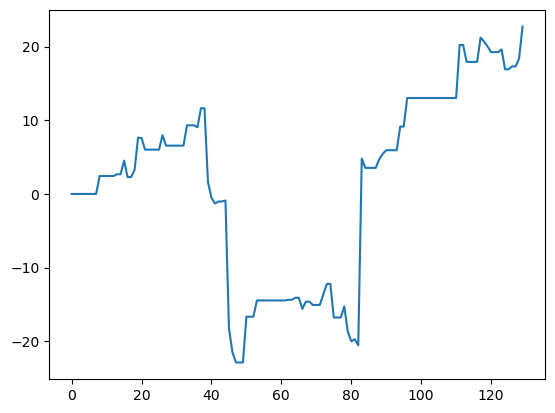

In [79]:
cumulative_returns = np.cumsum(returns)
plt.plot(cumulative_returns)
plt.savefig('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/plots/without clustering/monthly/BOVESPA_macd_rsi.png', dpi=300)
plt.show()

## Strat-2 RSI

In [80]:
def get_returns1(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_rsi.iloc[i,j]<30):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_rsi.iloc[i,j]>70):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            intrade.append(l)
        
        i = i+1

    return returns, intrade

In [81]:
returns1,intrade1 = get_returns1(master_macd, master_rsi, prices)

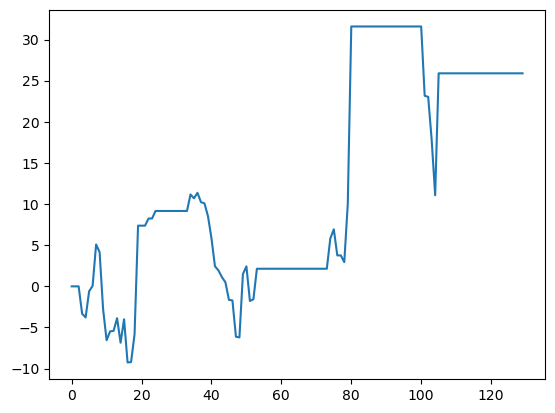

In [82]:
cumulative_returns = np.cumsum(returns1)
plt.plot(cumulative_returns)
plt.savefig('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/plots/without clustering/monthly/BOVESPA_rsi.png', dpi=300)
plt.show()